Basic Imports

In [1]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import multivariate_normal as mvn

### Loading the dataset

In [4]:
train_df = pd.read_csv('/content/MNIST_train.csv')

In [3]:
test_df = pd.read_csv('/content/MNIST_test.csv')

Shape of dataset

In [5]:
train_df.shape

(60000, 787)

In [6]:
test_df.shape

(10000, 787)

In [7]:
test_df

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dropping additional columns, which are repetation of index

In [9]:
# we dont need so many index so dropping the columns:
train_df = train_df.drop(['Unnamed: 0', 'index'], axis=1)
test_df = test_df.drop(['Unnamed: 0', 'index'], axis=1)

In [10]:
train_df

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Information about dataset

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, labels to 783
dtypes: int64(785)
memory usage: 359.3 MB


In [12]:
train_df.dtypes

labels    int64
0         int64
1         int64
2         int64
3         int64
          ...  
779       int64
780       int64
781       int64
782       int64
783       int64
Length: 785, dtype: object

Statistical distribution of dataset

In [13]:
summary_stats = train_df.describe()
summary_stats

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [14]:
# extracting the maximum value
max_value = summary_stats.loc['max'].max()
min_value = summary_stats.loc['min'].min()
print("Maximum value of train dataset:", max_value, "and Minimum value:", min_value)

Maximum value of train dataset: 255.0 and Minimum value: 0.0


we can see that max value of the range is 255 and min value is 0

### Scaling of Data

Normalisation: dividing by max value

In [15]:
# convert data to the range of 0 to 1
scaled_train_X = (train_df.drop('labels', axis=1)) / 255.0
scaled_test_X = (test_df.drop('labels', axis=1)) / 255.0

In [16]:
scaled_train_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


now we have got everything in the range of 0 to 1

In [17]:
train_df

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-18-198ef5dbde71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=labels, palette="viridis")
<ipython-input-18-198ef5dbde71>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  response = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontweight='light', fontsize='x-small')


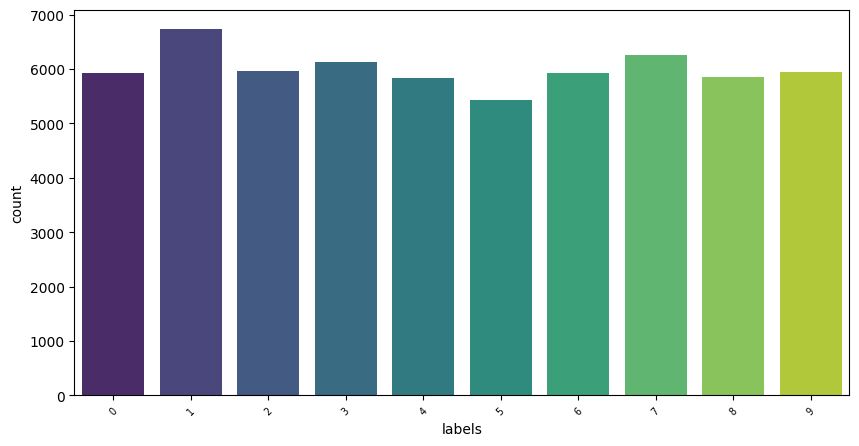

In [18]:
def plot_label_distribution(labels):
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=labels, palette="viridis")
    response = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontweight='light', fontsize='x-small')

labels = train_df['labels']
df = train_df.drop('labels', axis=1)

# visualize the label distribution
plot_label_distribution(labels)
plt.show()


here we can see label distribution is almost uniform

# BASELINE MODEL

## Naive base

In [19]:
class GaussNB():
  def __init__(self, epsilon=1e-2):
        self.epsilon = epsilon

  def fit(self, X, y):

    self.likelyhoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int)) # getting set of y as type int

    for k in self.K:
      X_k = X[y==k,:]
      self.likelyhoods[k]= {"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+epsilon} # function?
      self.priors[k]= len(X_k)/len(X)



  def predict(self, X):
    N, D = X.shape # N: number of samples, D is numver of features
    P_hat = np.zeros((N, len(self.K))) #initializes a numpy array P_hat of shape (N, len(self.K)) filled with zeros.
    # this array will store the predicted probabilities for each sample and each class.

    # apply BAYES THEOREM and calculate probability for each class

    for k,l in self.likelyhoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)



In [20]:
# separate features (X) and target variable (y)
X_train = scaled_train_X
y_train = train_df['labels']

In [21]:
# same for test set
X_test = scaled_test_X
y_test = test_df['labels']

In [22]:
X_train.shape

(60000, 784)

Converting the shape of X and y in the required numpy array

In [23]:
y_train = y_train.to_numpy()

In [24]:
X_train = X_train.to_numpy()

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [26]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Same for test set

In [27]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [28]:
# Split the training data into training and validation sets
split_ratio = 0.8  # 80% of data for training, 20% for validation
split_index = int(len(X_train) * split_ratio)

X_train_split = X_train[:split_index]
y_train_split = y_train[:split_index]

X_val_split = X_train[split_index:]
y_val_split = y_train[split_index:]


### Getting best hyperparameter on validation set

In [29]:
# Define different values of epsilon to tune

epsilons = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1,2, 0.5, 0.6]
# Train and evaluate the model for each epsilon
for epsilon in epsilons:
    model = GaussNB(epsilon=epsilon)
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val_split)
    accuracy = np.mean(y_pred == y_val_split)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy}")

Epsilon: 1e-05, Accuracy: 0.66975
Epsilon: 0.0001, Accuracy: 0.725
Epsilon: 0.001, Accuracy: 0.7764166666666666
Epsilon: 0.01, Accuracy: 0.8120833333333334
Epsilon: 0.1, Accuracy: 0.77825
Epsilon: 1, Accuracy: 0.6726666666666666
Epsilon: 2, Accuracy: 0.6553333333333333
Epsilon: 0.5, Accuracy: 0.7010833333333333
Epsilon: 0.6, Accuracy: 0.6935


best performing epsilon is 0.01,  with 81% accuracy so we will train our final model on this and check with test set

In [30]:
# training final model using both training and validation sets
final_model = GaussNB(epsilon=1e-2)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Final Model Test Accuracy: Epsilon: 1e-2, Accuracy: {accuracy}")

Final Model Test Accuracy: Epsilon: 1e-2, Accuracy: 0.6935


Hence on test set naive base can perform best up to 69% accuracy

___

# Gaussian Base

In [31]:
class GaussBayes:
    def __init__(self, epsilon=1e-2):
        self.epsilon = epsilon

    def fit(self, X, y):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y==k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)

            self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                                   "cov": (1/(N_k-1)) * np.matmul((X_k - mu_k).T, X_k - mu_k) + self.epsilon * np.identity(D)}

            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)


In [32]:
# Define different values of epsilon to tune
epsilons = [1e-5, 1e-4,1e-3, 1e-2, 1e-1,1,0.2,0.09,0.08,0.07, 0.06,0.05]

# Train and evaluate the model for each epsilon
for epsilon in epsilons:
    model = GaussBayes(epsilon=epsilon)
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val_split)
    accuracy = np.mean(y_pred == y_val_split)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy}")


Epsilon: 1e-05, Accuracy: 0.8325833333333333
Epsilon: 0.0001, Accuracy: 0.8690833333333333
Epsilon: 0.001, Accuracy: 0.9103333333333333
Epsilon: 0.01, Accuracy: 0.9474166666666667
Epsilon: 0.1, Accuracy: 0.955
Epsilon: 1, Accuracy: 0.881
Epsilon: 0.2, Accuracy: 0.9450833333333334
Epsilon: 0.09, Accuracy: 0.9559166666666666
Epsilon: 0.08, Accuracy: 0.9560833333333333
Epsilon: 0.07, Accuracy: 0.9569166666666666
Epsilon: 0.06, Accuracy: 0.9571666666666667
Epsilon: 0.05, Accuracy: 0.9568333333333333


Hence best performing epsilon is 0.6 for validation test

In [33]:
# training final model using both training and validation sets
final_model = GaussBayes(epsilon=0.06)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Final Model Test Accuracy: Epsilon: 1e-1 , Accuracy: {accuracy}")


Final Model Test Accuracy: Epsilon: 1e-1 , Accuracy: 0.9568333333333333


Confusion Mtrix to check errors:

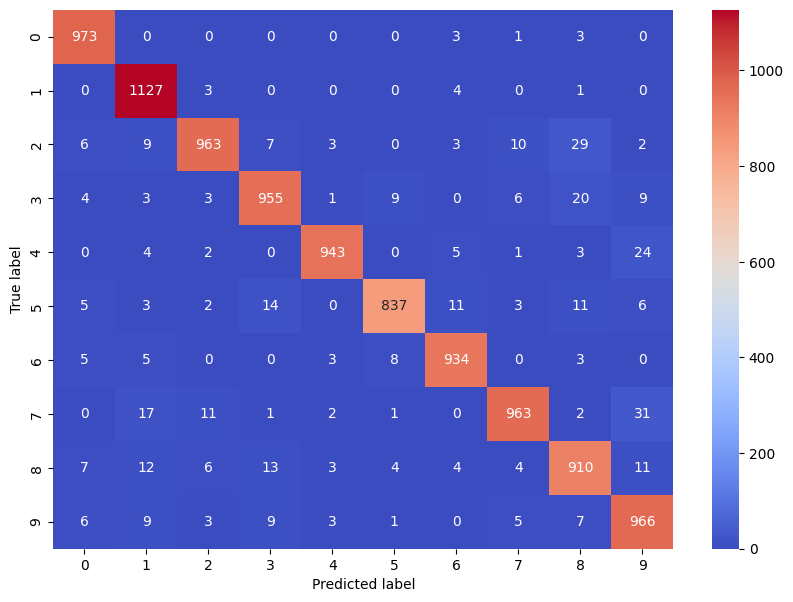

In [34]:
# Set a custom color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_pred, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)

# Plot the heatmap with the custom color palette
ax = sns.heatmap(cm, annot=True, fmt="d", cmap=custom_palette)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.show()

7 and 9 : 28 errors

2 and 8 : 27 errors

7 and 1 : 22 errors

4 and 9 : 23 errors

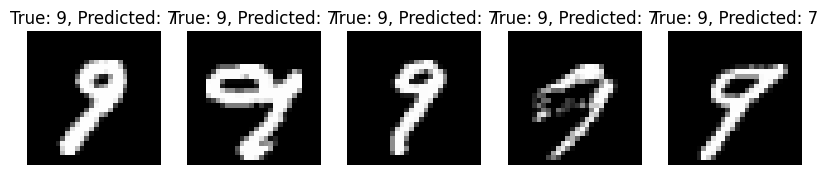

In [35]:
#plot misclassified instances
def plot_misclassified_instances(X_test, y_test, y_pred, true_label, pred_label, num_examples=5):
    misclassified_indices = np.where((y_test == true_label) & (y_pred == pred_label))[0]
    misclassified_samples = X_test[misclassified_indices]
    num_samples = min(num_examples, len(misclassified_samples))
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(misclassified_samples[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_label}, Predicted: {pred_label}')
        plt.axis('off')
    plt.show()

# error Analysis
true_label = 9
pred_label = 7
plot_misclassified_instances(X_test, y_test, y_pred, true_label, pred_label)



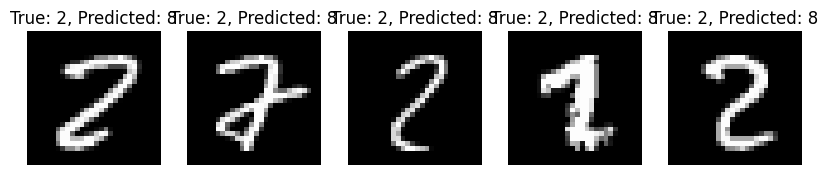

In [36]:
# Error Analysis
true_label = 2
pred_label = 8
plot_misclassified_instances(X_test, y_test, y_pred, true_label, pred_label)



To further remove errors we can add a little rotation of image and some Noises, or more data if available

________________________________________________________________

# KNN Classifier

Installation for utilisation of GPU

In [ ]:
import cupy as cp

In [ ]:
class KNNClassifier:
    def fit(self, X, y):
        self.X = cp.array(X)
        self.y = cp.array(y)

    def predict(self, X, K, epsilon=1e-3):
        X = cp.array(X)
        N = len(X)
        y_hat = cp.zeros(N)
        for i in range(N):
            dist2 = cp.sum((self.X - X[i])**2, axis=1)
            idxt = cp.argsort(dist2)[:K]
            gamma_k = 1 / (cp.sqrt(dist2[idxt] + epsilon))
            y_hat[i] = cp.bincount(self.y[idxt], weights=gamma_k).argmax()

        return cp.asnumpy(y_hat)  # Convert back to NumPy array for compatibility with other code



In [ ]:
knn_model= KNNClassifier()
knn_model.fit(X_train_split,y_train_split)

In [ ]:
y_hat= knn_model.predict(X_val_split,1)

In [ ]:
# Compute accuracy and assign it to a variable
accuracy_value = np.mean(y_val_split == y_hat)

# Now you can use the accuracy value as needed
print(f"Accuracy: {accuracy_value}")


Accuracy: 0.9681666666666666


Here we have 96% accuracy with K = 1 and  epsilon=1e-3.
Run using the GPU so high compute requirement / more time

_____